In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import gc
from scipy.interpolate import griddata
import scipy.io as sio
import scipy.interpolate as si
import scipy.integrate as sint

import full_expression_PSD as full
import modular_PSD as mod
import extended_PSD as ext

sns.set(style='ticks', palette="Set2")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
# gTurbColor = '#2E282A'
# gImpColor = '#EDB88B'

# fTurbColor = '#17BEBB'
# fImpColor = '#EF3E36'

gTurbColor = '#7678ED'
fTurbColor = '#3D348B'

gImpColor = '#F7B801'
fImpColor = '#F18701'

In [3]:
freq = np.linspace(0.8, 5, 1000)

impactsPSD_default = full.impact_full_expression(freq)
impactsPSD_default_dB = 10 * np.log10(impactsPSD_default)

# impactsPSD_min = impact_full_expression(freq, Q=30)
# impactsPSD_min_dB = 10 * np.log10(impactsPSD_min)

# impactsPSD_max = impact_full_expression(freq, Q=150)
# impactsPSD_max_dB = 10 * np.log10(impactsPSD_max)

impactsPSD_min = full.impact_full_expression(freq, u_mean=40, eb=0.5, phi_p=0.01, Dr=6.25e-5, R=2,
                          df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
impactsPSD_min_dB = 10 * np.log10(impactsPSD_min)

impactsPSD_max = full.impact_full_expression(freq, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                          df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
impactsPSD_max_dB = 10 * np.log10(impactsPSD_max)



impactsPSD10_min = full.impact_full_expression(freq, u_mean=60, eb=0.5, phi_p=0.01, Dr=6.25e-5, R=2,
                          df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
impactsPSD10_min_dB = 10 * np.log10(impactsPSD10_min)

impactsPSD10_max = full.impact_full_expression(freq, u_mean=160, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                          df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
impactsPSD10_max_dB = 10 * np.log10(impactsPSD10_max)



turbulencePSD_default = full.turbulence_full_expression(freq)
turbulencePSD_default_dB = 10 * np.log10(turbulencePSD_default)

# turbulencePSD_min = turbulence_full_expression(freq, Q=30)
# turbulencePSD_min_dB = 10 * np.log10(turbulencePSD_min)

# turbulencePSD_max = turbulence_full_expression(freq, Q=150)
# turbulencePSD_max_dB = 10 * np.log10(turbulencePSD_max)

turbulencePSD_min = full.turbulence_full_expression(freq, u_mean=40, Db=0.01, rho_g=0.05, rho_s=2100, R=2,
                              df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
turbulencePSD_min_dB = 10 * np.log10(turbulencePSD_min)

turbulencePSD_max = full.turbulence_full_expression(freq, u_mean=300, Db=1, rho_g=5, rho_s=2700, R=40,
                              df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
turbulencePSD_max_dB = 10 * np.log10(turbulencePSD_max)


turbulencePSD10_min = full.turbulence_full_expression(freq, u_mean=170, Db=0.01, rho_g=0.05, rho_s=2100, R=2,
                              df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
turbulencePSD10_min_dB = 10 * np.log10(turbulencePSD10_min)

turbulencePSD10_max = full.turbulence_full_expression(freq, u_mean=170, Db=1, rho_g=5, rho_s=2700, R=40,
                              df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
turbulencePSD10_max_dB = 10 * np.log10(turbulencePSD10_max)

<IPython.core.display.Javascript object>


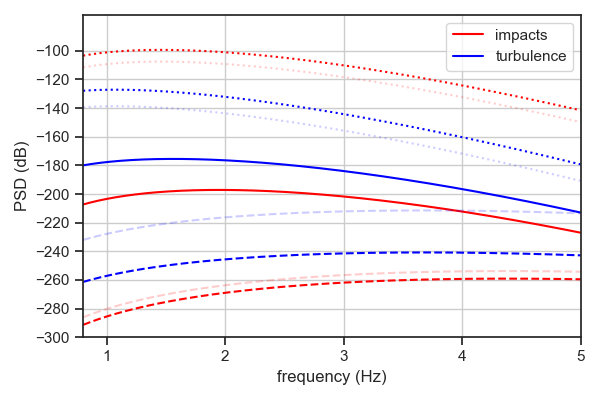

In [4]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, impactsPSD_default_dB, color='r', label='impacts')
plt.plot(freq, impactsPSD_min_dB, color='r', linestyle='--')
plt.plot(freq, impactsPSD_max_dB, color='r', linestyle=':')
plt.plot(freq, impactsPSD10_min_dB, alpha=0.2, color='r', linestyle='--')
plt.plot(freq, impactsPSD10_max_dB, alpha=0.2, color='r', linestyle=':')
plt.plot(freq, turbulencePSD_default_dB, color='b', label='turbulence')
plt.plot(freq, turbulencePSD_min_dB, color='b', linestyle='--')
plt.plot(freq, turbulencePSD_max_dB, color='b', linestyle=':')
plt.plot(freq, turbulencePSD10_min_dB, alpha=0.2, color='b', linestyle='--')
plt.plot(freq, turbulencePSD10_max_dB, alpha=0.2, color='b', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/min-max-PSD-statedValues.png', dpi=300)
plt.show()

Below is the implementation of the modular setup: each expression used to build up the full expression (see above) in Gestrich et al (2020). Note that the two version are inconsistent due to a suspected algebra error on the author's part in arriving at the full expression.

In [17]:
freq = np.linspace(0.8, 5, 1000)

impactsPSD_mod = mod.impact_PSD(freq) / (0.01897 * np.pi**5) * 0.088
impactsPSD_mod_dB = 10 * np.log10(impactsPSD_mod)

impactsPSD_mod_min = mod.impact_PSD(freq, u_mean=40, eb=0.5, phi_p=0.01, Dr=6.25e-5, R=2,
                          df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
impactsPSD_mod_min_dB = 10 * np.log10(impactsPSD_mod_min)

impactsPSD_mod_max = mod.impact_PSD(freq, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                          df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
impactsPSD_mod_max_dB = 10 * np.log10(impactsPSD_mod_max)

impactsPSD_mod_D = mod.impact_PSD(freq, Dr=6.25e-5)
impactsPSD_mod_D = 10 * np.log10(impactsPSD_mod_D)



turbulencePSD_mod = mod.turbulence_PSD(freq) / (0.00113243) * 5.8e-4 
turbulencePSD_mod_dB = 10 * np.log10(turbulencePSD_mod)

turbulencePSD_mod_min = mod.turbulence_PSD(freq, u_mean=40, Db=0.01, rho_g=0.05, rho_s=2100, R=2,
                              df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
turbulencePSD_mod_min_dB = 10 * np.log10(turbulencePSD_mod_min)

turbulencePSD_mod_max = mod.turbulence_PSD(freq, u_mean=300, Db=1, rho_g=5, rho_s=2700, R=40,
                              df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
turbulencePSD_mod_max_dB = 10 * np.log10(turbulencePSD_mod_max)

<IPython.core.display.Javascript object>


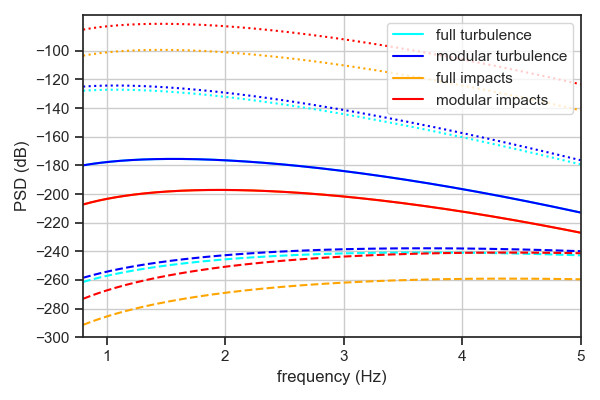

In [18]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, turbulencePSD_default_dB, color='cyan', label='full turbulence')
plt.plot(freq, turbulencePSD_min_dB, color='cyan', linestyle='--')
plt.plot(freq, turbulencePSD_max_dB, color='cyan', linestyle=':')
# plt.plot(freq, turbulencePSD10_min_dB, alpha=0.2, color='cyan', linestyle='--')
# plt.plot(freq, turbulencePSD10_max_dB, alpha=0.2, color='cyan', linestyle=':')

plt.plot(freq, turbulencePSD_mod_dB, color='b', label='modular turbulence')
plt.plot(freq, turbulencePSD_mod_min_dB, color='b', linestyle='--')
plt.plot(freq, turbulencePSD_mod_max_dB, color='b', linestyle=':')

plt.plot(freq, impactsPSD_default_dB, color='orange', label='full impacts')
plt.plot(freq, impactsPSD_min_dB, color='orange', linestyle='--')
plt.plot(freq, impactsPSD_max_dB, color='orange', linestyle=':')
# plt.plot(freq, impactsPSD10_min_dB, alpha=0.2, color='orange', linestyle='--')
# plt.plot(freq, impactsPSD10_max_dB, alpha=0.2, color='orange', linestyle=':')

plt.plot(freq, impactsPSD_mod_dB, color='r', label='modular impacts')
# plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


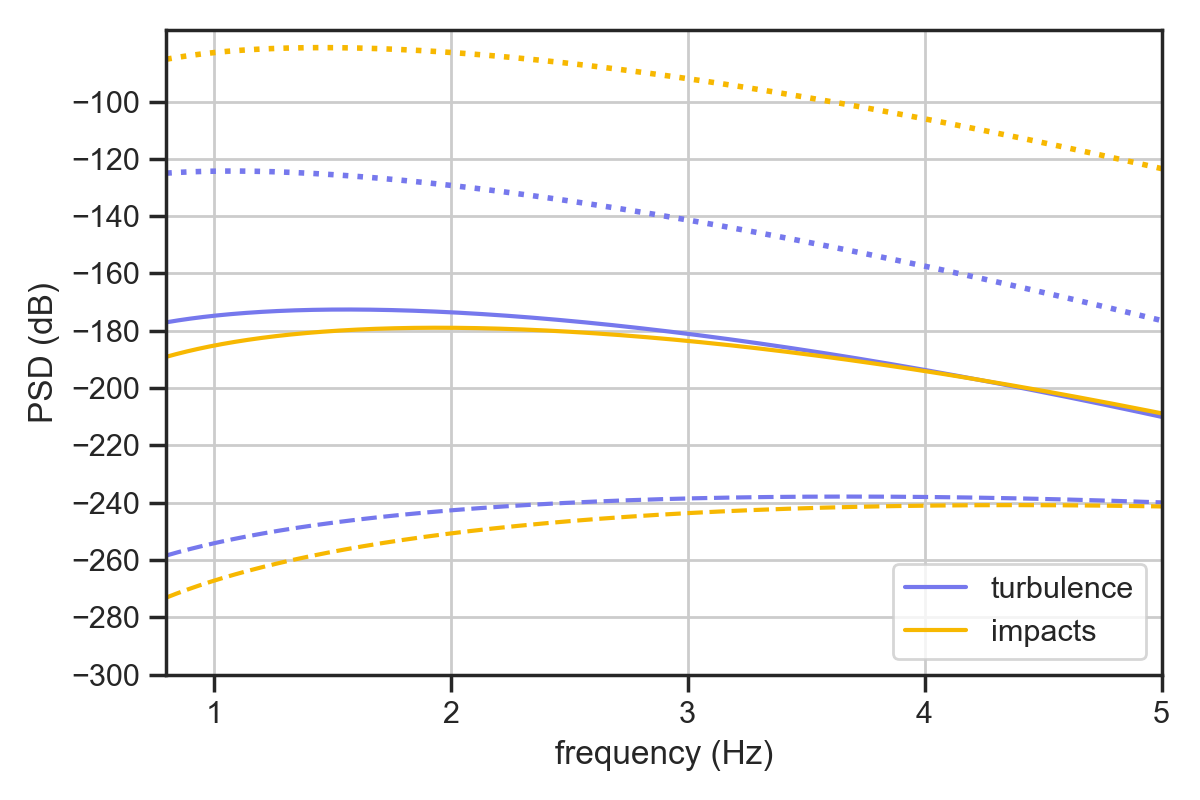

In [168]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, turbulencePSD_mod_dB, color=gTurbColor, label='turbulence')
plt.plot(freq, turbulencePSD_mod_min_dB, color=gTurbColor, linestyle='--')
plt.plot(freq, turbulencePSD_mod_max_dB, color=gTurbColor, linestyle=':', linewidth=2)

plt.plot(freq, impactsPSD_mod_dB, color=gImpColor, label='impacts')
plt.plot(freq, impactsPSD_mod_min_dB, color=gImpColor, linestyle='--')
plt.plot(freq, impactsPSD_mod_max_dB, color=gImpColor, linestyle=':', linewidth=2)

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/gestrich-PSD-fig10-recreation.png', dpi=300)
plt.show()

Changing implementation to using numerical Green's functions, rather than closed-form Rayleigh wave GFs.

In [9]:
directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/lesageGeneric_conduit/extended_1km_sf/10km/'
ll = 1000
depths = np.linspace(1150, 150, ll)

f, gf_hat, gf_time = ext.load_gfs_ES(directory, depths, RETURNTIME=True)

In [169]:
Dr = 1.4e-3 * np.ones(ll)
Db = 0.5 * np.ones(ll)
u_mean = 120 * np.ones(ll)
phi_p = 0.1 * np.ones(ll)
rho_g = 0.5 * np.ones(ll)

num_imp = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean, Dr, phi_p)
num_imp_integrated = np.sum(num_imp, axis=0)
num_imp_dB = 10 * np.log10(num_imp_integrated)

num_turb = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, u_mean, Db, rho_g)
num_turb_integrated = np.sum(num_turb, axis=0)
num_turb_dB = 10 * np.log10(num_turb_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1810611841.py:9: RuntimeWarning: divide by zero encountered in log10
  num_imp_dB = 10 * np.log10(num_imp_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1810611841.py:9: RuntimeWarning: invalid value encountered in multiply
  num_imp_dB = 10 * np.log10(num_imp_integrated)
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:152: RuntimeWarning: divide by zero encountered in power
  Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:238: RuntimeWarning: invalid value encountered in multiply
  FGjz2 = F_tilda * (np.sqrt(2) * gfs[0][:,:,0] + gfs[1][:,:,0])**2
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:241: RuntimeWarning: invalid value encountered in multiply
  PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * FGjz2


In [11]:
# impactsPSD_mod_min = mod.impact_PSD(freq, u_mean=40, eb=0.5, phi_p=0.01, Dr=6.25e-5, R=2,
#                           df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
# impactsPSD_mod_min_dB = 10 * np.log10(impactsPSD_mod_min)

# impactsPSD_mod_max = mod.impact_PSD(freq, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
#                           df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
# impactsPSD_mod_max_dB = 10 * np.log10(impactsPSD_mod_max)

# Dr = 6.25e-5 * np.ones(ll)
# Db = 0.5 * np.ones(ll)
# u_mean = 40 * np.ones(ll)
# phi_p = 0.01 * np.ones(ll)
# rho_g = 0.5 * np.ones(ll)

# num_imp_min = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean, Dr, phi_p, eb=0.5, R=2)
# num_imp_min_integrated = np.sum(num_imp_min, axis=0)
# num_imp_min_dB = 10 * np.log10(num_imp_min_integrated)

# num_turb = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, u_mean, Db, rho_g)
# num_turb_integrated = np.sum(num_turb, axis=0)
# num_turb_dB = 10 * np.log10(num_turb_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/986601955.py:17: RuntimeWarning: divide by zero encountered in log10
  num_imp_min_dB = 10 * np.log10(num_imp_min_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/986601955.py:17: RuntimeWarning: invalid value encountered in multiply
  num_imp_min_dB = 10 * np.log10(num_imp_min_integrated)


In [12]:
impactsPSD_mod_1 = mod.impact_PSD(freq, df=1000, rx=10e3, Q=30, rho_s=2700)
impactsPSD_mod_1_dB = 10 * np.log10(impactsPSD_mod_1)

turbulencePSD_mod_1 = mod.turbulence_PSD(freq, df=1000, rx=10e3, Q=30, rho_s=2700)
turbulencePSD_mod_1_dB = 10 * np.log10(turbulencePSD_mod_1)

<IPython.core.display.Javascript object>


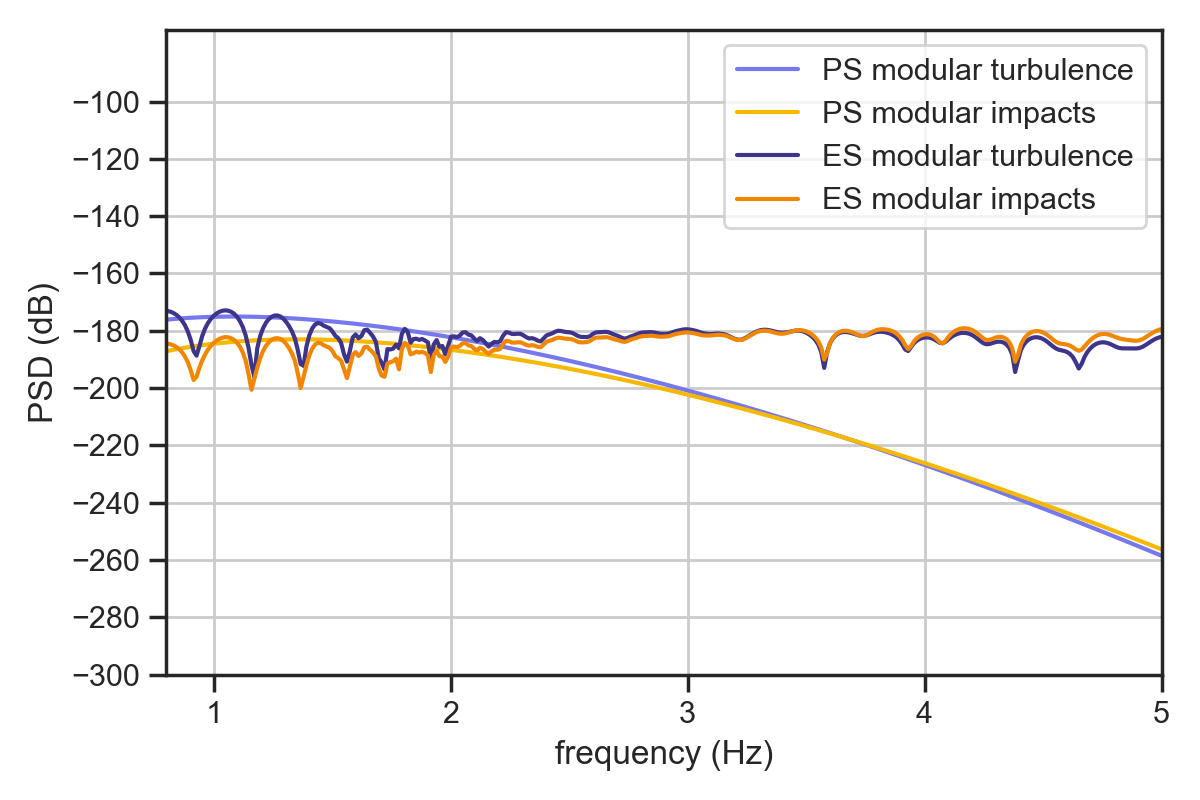

/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [174]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, turbulencePSD_mod_1_dB, color=gTurbColor, label='PS modular turbulence')
plt.plot(freq, impactsPSD_mod_1_dB, color=gImpColor, label='PS modular impacts')

plt.plot(f, num_turb_dB, color=fTurbColor, label='ES modular turbulence')
plt.plot(f, num_imp_dB, color=fImpColor, label='ES modular impacts')
# plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
# plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
# plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

Introducing steady-state solver to plug into above model

In [14]:
import numpy as np
import scipy
import scipy.integrate
from scipy.special import erf
import matplotlib.pyplot as plt
import os

os.chdir('/Users/kcoppess/muspelheim/quail_volcano/src/')

import compressible_conduit_steady.steady_state as SS
import compressible_conduit_steady.material_properties as matprops

os.chdir('/Users/kcoppess/muspelheim/quail_ODESS_map/')

In [18]:
Numerics = {
  # Solution order; these correspond to:
  # 0: 1 node in each element representing the average value
  # 1: 2 nodes in each element constituting a linear representation of the
  #    solution in the element
  # 2: 3 nodes in each element constituting a quadratic representation of the
  #    solution in the element
  "SolutionOrder" : 2,
#   "SolutionBasis" : "LagrangeSeg",
#   "Solver" : "DG",
#   "ApplyLimiters" : "PositivityPreservingMultiphasevpT",
#   "ElementQuadrature" : "GaussLegendre",
#   "FaceQuadrature" : "GaussLegendre",
#   # Artificial viscosity adds a diffusion term to all equations, where the                                                                                                                              
#   # strong form residual is large and where the pressure gradient relative to
#   # hydrostatic is large
#   "ArtificialViscosity" : True,
#   "AVParameter" : 0.3,
#   # If L2InitialCondition is false, use interpolation instead of L2 projection of Riemann data
#   'L2InitialCondition': False,
}

Mesh = {
#     "File" : None,
#     "ElementShape" : "Segment",
    # Use even number if using initial condition with discontinuous pressure
    "NumElemsX" : 1000, 
    "xmin" : -1000.0-150,
    "xmax" : 0.0-150,
}

n_elems_per_part = Mesh["NumElemsX"]
n_elems_global = 2*n_elems_per_part
if Numerics["SolutionOrder"] == 0:
    n_nodes_global = n_elems_global
elif Numerics["SolutionOrder"] == 1:
    n_nodes_global = n_elems_global + 1
elif Numerics["SolutionOrder"] == 2:
    n_nodes_global = 2*n_elems_global + 1
else:
    raise ValueError("Oops, is there solution order > 2?")
x_global = np.linspace(Mesh["xmin"], Mesh["xmax"], n_nodes_global)

phi_crys = 0.4 * (1.1 - 0.1 * np.cos(0.0)) #0.4025 * (1.1 - 0.1 * np.cos(0.0))
chi_water = 0.05 #0.05055
yWt_init = chi_water * (1 - phi_crys) / (1 + chi_water)
yC_init = phi_crys

p_vent = 1e5          # Vent pressure
inlet_input_val = 3 # Inlet velocity; see also BoundaryCondition["x1"]
input_type = "u"

n0 = chi_water
Sm = 5e-6

props = {
    "yC": yC_init,
    "yWt": yWt_init,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 1.0,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n0 / Sm)**2,
    "solubility_k": Sm,
    "solubility_n": 0.5,
    "neglect_edfm": True,
    "fragsmooth_scale": 0.01,
}

In [19]:
x1 = x_global.copy()
x_quail = np.expand_dims(x1, axis=(1, 2))

ulow = 35e6 
uhigh = 50e6

f1 = SS.SteadyState(x1, p_vent, ulow, input_type='p', override_properties=props)
f5 = SS.SteadyState(x1, p_vent, uhigh, input_type='p', override_properties=props)

soln1 = f1(x1, io_format="phy")
p1, h1, y1, yFsoln1 = soln1[0:4]
T1 = f1.T_ph(p1, h1, y1)
rho1 = 1.0 / f1.v_mix(p1, T1, y1)
soln_quail1 = f1(x_quail, io_format="quail")
u1 = soln_quail1[:,0,3] / rho1
c_fn1 = lambda p, h, yWv: f1.mixture.sound_speed(
  p, f1.T_ph(p, h, yWv), f1.yA, yWv, 1.0 - f1.yA - yWv)
c1 = np.array(list(map(c_fn1, p1, h1, y1)))
phi1 = f1.mixture.vf_g(p1, T1, f1.yA, y1, 1.0-f1.yA-y1)
rho_g1 = (soln_quail1[:,0,0] + soln_quail1[:,0,1]) / phi1

soln5 = f5(x1, io_format="phy")
p5, h5, y5, yFsoln5 = soln5[0:4]
T5 = f5.T_ph(p5, h5, y5)
rho5 = 1.0 / f5.v_mix(p5, T5, y5)
soln_quail5 = f5(x_quail, io_format="quail")
u5 = soln_quail5[:,0,3] / rho5
c_fn5 = lambda p, h, yWv: f5.mixture.sound_speed(
  p, f5.T_ph(p, h, yWv), f5.yA, yWv, 1.0 - f5.yA - yWv)
c5 = np.array(list(map(c_fn5, p5, h5, y5)))
phi5 = f5.mixture.vf_g(p5, T5, f5.yA, y5, 1.0-f5.yA-y5)
rho_g5 = (soln_quail5[:,0,0] + soln_quail5[:,0,1]) / phi5

163952.36432610906 and 163266.6949485268
1.0039502813959735 and -0.1
Computed choking mass flux: 1474.800901262454; choking pressure: 163266.91370023458.
Choked at vent.
213235.64547274573 and 160581.89217845857
1.0015615964375397 and -0.1
Computed choking mass flux: 1480.5432744358611; choking pressure: 160582.57571752145.
Choked at vent.


<IPython.core.display.Javascript object>


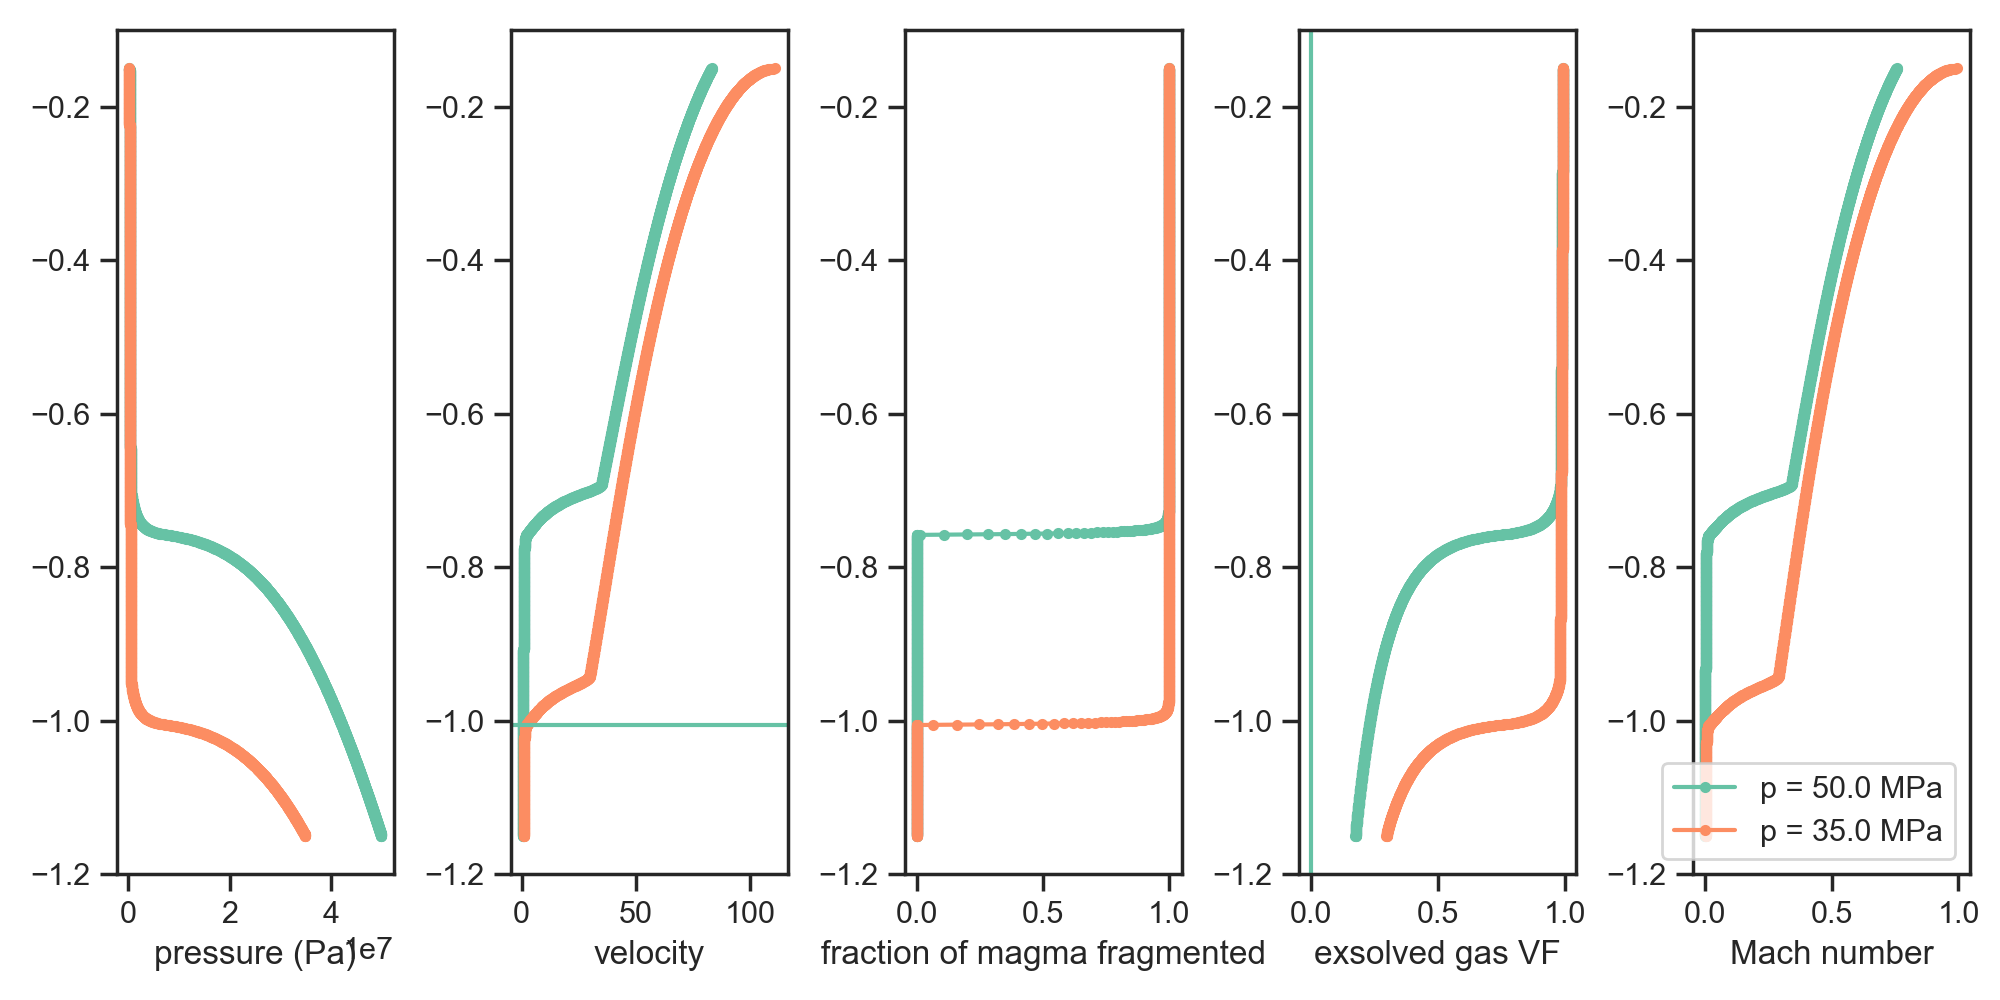

In [20]:
%matplotlib notebook
frag_depth = np.argwhere(phi1 > 0.75)[0,0]

x = x_global.copy()

plt.figure(figsize=(10,5))
plt.subplot(1,5,1)
plt.plot(p5, x*1e-3, '.-')
plt.plot(p1, x*1e-3, '.-')
plt.xlabel('pressure (Pa)')
plt.subplot(1,5,2)
plt.plot(u5, x*1e-3, '.-')
plt.plot(u1, x*1e-3, '.-')
plt.axhline(x[frag_depth]*1e-3)
plt.xlabel('velocity')
plt.subplot(1,5,3)
plt.plot(yFsoln5 / (1.0 - y5), x*1e-3, '.-')
plt.plot(yFsoln1 / (1.0 - y1), (x)*1e-3, '.-')
# plt.ylim(-0.55, -0.5)
plt.xlabel('fraction of magma fragmented')
plt.subplot(1,5,4)
plt.plot(phi5, x*1e-3, '.-')
plt.plot(phi1, x*1e-3, '.-')
plt.axvline(0)
plt.xlabel('exsolved gas VF')
plt.subplot(1,5,5)
plt.plot(u5/c5, x*1e-3, '.-', label='p = '+str(round(uhigh*1e-6, 2))+' MPa')
plt.plot(u1/c1, x*1e-3, '.-', label='p = '+str(round(ulow*1e-6, 2))+' MPa')
plt.xlabel('Mach number')
plt.legend(frameon=True, loc=4)

plt.tight_layout()
# phi5 = ss.mixture.vf_g(p5, ss.mixture.T_ph(p5, h5, ss.yA, y5, 1.0-ss.yA-y5), ss.yA, y5, 1.0-ss.yA-y5)
# plt.plot(phi5, x, '.-')
# phi1 = ss.mixture.vf_g(p1, ss.mixture.T_ph(p1, h1, ss.yA, y1, 1.0-ss.yA-y1), ss.yA, y1, 1.0-ss.yA-y1)
# plt.plot(phi1, x, '.-')
# plt.xlabel('exsolved gas volume fraction')
plt.show() 

In [22]:
frag_depth = np.argwhere(phi1 > 0.75)[0,0]

depths = -x[frag_depth:]
ll = len(depths)
u_mean = u1[frag_depth:]
phi_p = 1.0 - phi1[frag_depth:]
rho_g = rho_g1[frag_depth:]

Dr = 1.4e-3 * np.ones(ll) #np.linspace(0.5, 1.4e-3, ll) #1.4e-3
Db = 0.5 * np.ones(ll)

directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/lesageGeneric_conduit/extended_1km_sf/10km/'
f, gf_hat, gf_time = ext.load_gfs_ES(directory, depths, RETURNTIME=True)

SSnum_imp = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean, Dr, phi_p, dz = 0.5, R=20)
SSnum_imp_integrated = np.sum(SSnum_imp, axis=0)
SSnum_imp_dB = 10 * np.log10(SSnum_imp_integrated)

SSnum_turb = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, u_mean, Db, rho_g, dz = 0.5, R=20)
SSnum_turb_integrated = np.sum(SSnum_turb, axis=0)
SSnum_turb_dB = 10 * np.log10(SSnum_turb_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1147815605.py:17: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_dB = 10 * np.log10(SSnum_imp_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1147815605.py:17: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_dB = 10 * np.log10(SSnum_imp_integrated)
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:152: RuntimeWarning: divide by zero encountered in power
  Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:238: RuntimeWarning: invalid value encountered in multiply
  FGjz2 = F_tilda * (np.sqrt(2) * gfs[0][:,:,0] + gfs[1][:,:,0])**2
/Users/kcoppess/muspelheim/gestrich-model/extended_PSD.py:241: RuntimeWarning: invalid value encountered in multiply
  PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * FGjz2


In [23]:
frag_depth5 = np.argwhere(phi5 > 0.75)[0,0]

depths5 = -x[frag_depth5:]
ll5 = len(depths5)
u_mean5 = u5[frag_depth5:]
phi_p5 = 1.0 - phi5[frag_depth5:]
rho_g55 = rho_g5[frag_depth5:]

Dr5 = 1.4e-3 * np.ones(ll5) #np.linspace(0.5, 1.4e-3, ll) #1.4e-3
Db5 = 0.5 * np.ones(ll5)

directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/lesageGeneric_conduit/extended_1km_sf/10km/'
f5, gf_hat5 = ext.load_gfs_ES(directory, depths5)

SS5num_imp = ext.impact_PSD_ES_numGF(f5, depths5, gf_hat5, u_mean5, Dr5, phi_p5, dz = 0.5, R=20)
SS5num_imp_integrated = np.sum(SS5num_imp, axis=0)
SS5num_imp_dB = 10 * np.log10(SS5num_imp_integrated)

SS5num_turb = ext.turbulence_PSD_ES_numGF(f5, depths5, gf_hat5, u_mean5, Db5, rho_g55, dz = 0.5, R=20)
SS5num_turb_integrated = np.sum(SS5num_turb, axis=0)
SS5num_turb_dB = 10 * np.log10(SS5num_turb_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/3863447373.py:17: RuntimeWarning: divide by zero encountered in log10
  SS5num_imp_dB = 10 * np.log10(SS5num_imp_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/3863447373.py:17: RuntimeWarning: invalid value encountered in multiply
  SS5num_imp_dB = 10 * np.log10(SS5num_imp_integrated)


In [24]:
frag_depth = np.argwhere(phi1 > 0.75)[0,0]

depths = -x[frag_depth:]
ll = len(depths)
Au_mean = np.average(u1[frag_depth:]) * np.ones(ll)
Aphi_p = np.average(1.0 - phi1[frag_depth:]) * np.ones(ll)
Arho_g = np.average(rho_g1[frag_depth:]) * np.ones(ll)

Dr = 1.4e-3 * np.ones(ll) #np.linspace(0.5, 1.4e-3, ll) #1.4e-3
Db = 0.5 * np.ones(ll)

directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/lesageGeneric_conduit/extended_1km_sf/10km/'
f, gf_hat = ext.load_gfs_ES(directory, depths)

AvSSnum_imp = ext.impact_PSD_ES_numGF(f, depths, gf_hat, Au_mean, Dr, Aphi_p, dz = 0.5, R=20)
AvSSnum_imp_integrated = np.sum(AvSSnum_imp, axis=0)
AvSSnum_imp_dB = 10 * np.log10(AvSSnum_imp_integrated)

AvSSnum_turb = ext.turbulence_PSD_ES_numGF(f, depths, gf_hat, Au_mean, Db, Arho_g, dz = 0.5, R=20)
AvSSnum_turb_integrated = np.sum(AvSSnum_turb, axis=0)
AvSSnum_turb_dB = 10 * np.log10(AvSSnum_turb_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1033759533.py:17: RuntimeWarning: divide by zero encountered in log10
  AvSSnum_imp_dB = 10 * np.log10(AvSSnum_imp_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1033759533.py:17: RuntimeWarning: invalid value encountered in multiply
  AvSSnum_imp_dB = 10 * np.log10(AvSSnum_imp_integrated)


<IPython.core.display.Javascript object>


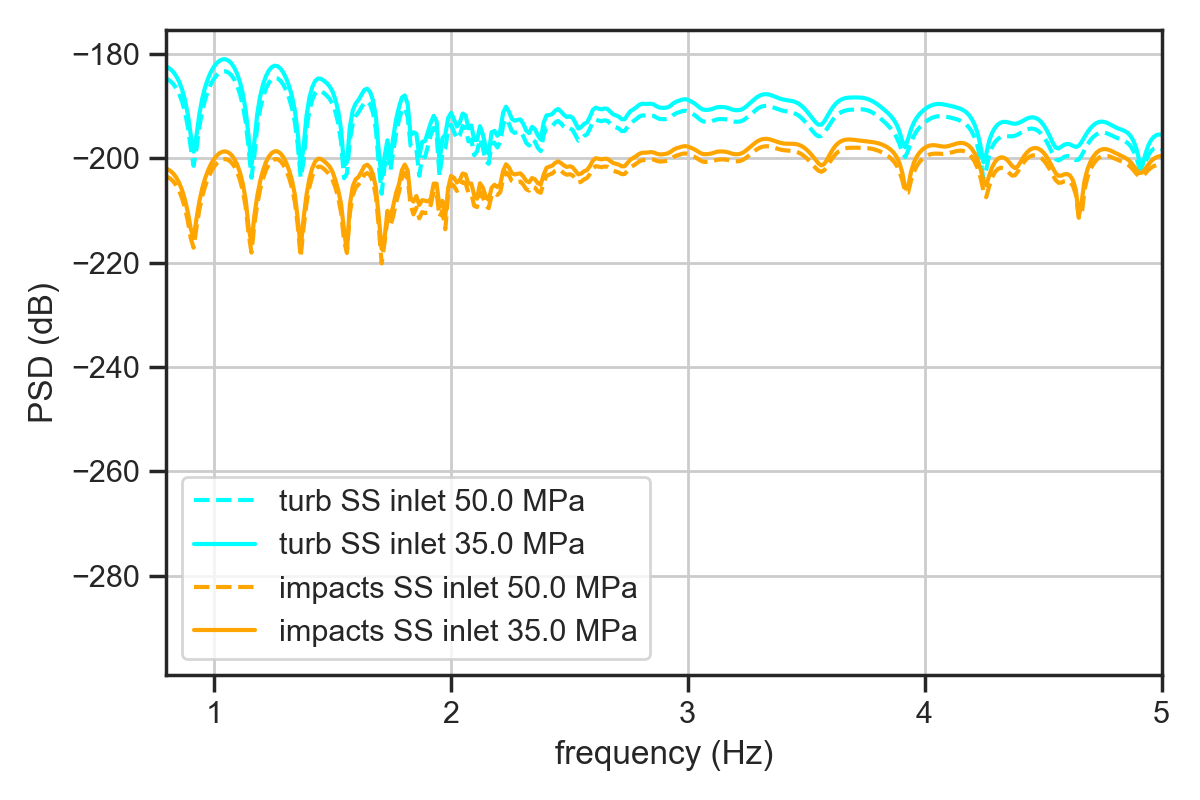

/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [25]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(f, SS5num_turb_dB, color='cyan', linestyle='--', label='turb SS inlet '+str(uhigh*1e-6)+' MPa')
plt.plot(f, SSnum_turb_dB, color='cyan', linestyle='-', label='turb SS inlet '+str(ulow*1e-6)+' MPa')


plt.plot(f, SS5num_imp_dB, color='orange', linestyle='--', label='impacts SS inlet '+str(uhigh*1e-6)+' MPa')
plt.plot(f, SSnum_imp_dB, color='orange', linestyle='-', label='impacts SS inlet '+str(ulow*1e-6)+' MPa')
# plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
# plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
# plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
# plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

In [26]:
impactsPSD_mod_2 = mod.impact_PSD(freq, u_mean=np.average(u_mean), df=(0.5*ll), phi_p=np.average(phi_p),
                              Dr=np.average(Dr), R=20, rx=10e3, Q=30, rho_s=2700)
impactsPSD_mod_2_dB = 10 * np.log10(impactsPSD_mod_2)

turbulencePSD_mod_2 = mod.turbulence_PSD(freq, u_mean=np.average(u_mean), df=(0.5*ll), rho_g=np.average(rho_g), 
                                     Db=np.average(Db), R=20, rx=10e3, Q=30, rho_s=2700)
turbulencePSD_mod_2_dB = 10 * np.log10(turbulencePSD_mod_2)

<IPython.core.display.Javascript object>


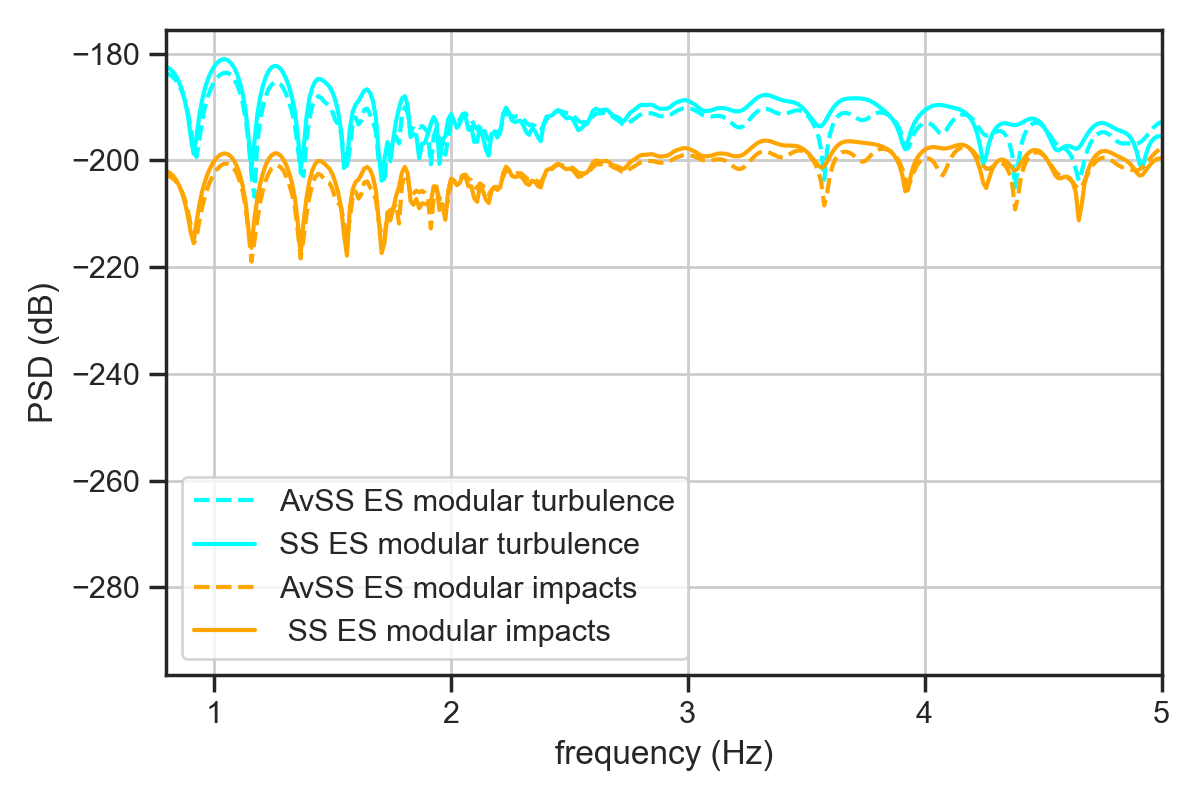

/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [27]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(f, AvSSnum_turb_dB, color='cyan', linestyle='--', label='AvSS ES modular turbulence')
plt.plot(f, SSnum_turb_dB, color='cyan', linestyle='-', label='SS ES modular turbulence')

plt.plot(f, AvSSnum_imp_dB, color='orange', linestyle='--', label='AvSS ES modular impacts')
plt.plot(f, SSnum_imp_dB, color='orange', linestyle='-', label=' SS ES modular impacts')
# plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
# plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
# plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
# plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


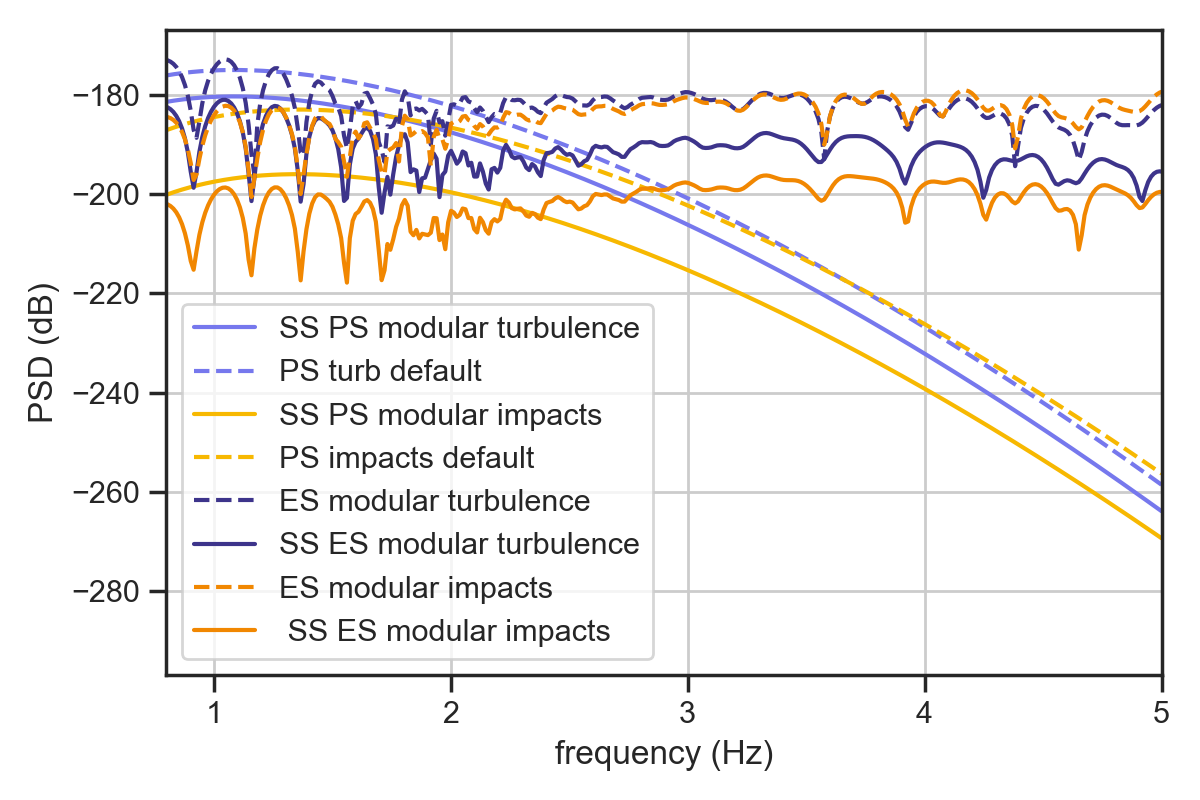

/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [172]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, turbulencePSD_mod_2_dB, color=gTurbColor, label='SS PS modular turbulence')
plt.plot(freq, turbulencePSD_mod_1_dB, color=gTurbColor, linestyle='--', label='PS turb default')
plt.plot(freq, impactsPSD_mod_2_dB, color=gImpColor, label='SS PS modular impacts')
plt.plot(freq, impactsPSD_mod_1_dB, color=gImpColor, linestyle='--', label='PS impacts default')

plt.plot(f, num_turb_dB, color=fTurbColor, linestyle='--', label='ES modular turbulence')
plt.plot(f, SSnum_turb_dB, color=fTurbColor, linestyle='-', label='SS ES modular turbulence')
plt.plot(f, num_imp_dB, color=fImpColor, linestyle='--', label='ES modular impacts')
plt.plot(f, SSnum_imp_dB, color=fImpColor, linestyle='-', label=' SS ES modular impacts')
# plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
# plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
# plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
# plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

In [29]:
Dr_lin = np.linspace(0.5, 1.4e-3, ll)

SSnum_imp_lin = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean, Dr_lin, phi_p, dz = 0.5, R=20)
SSnum_imp_lin_integrated = np.sum(SSnum_imp_lin, axis=0)
SSnum_imp_lin_dB = 10 * np.log10(SSnum_imp_lin_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1087356490.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_lin_dB = 10 * np.log10(SSnum_imp_lin_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1087356490.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_lin_dB = 10 * np.log10(SSnum_imp_lin_integrated)


In [30]:
Dr_linR = np.flip(Dr_lin)

SSnum_imp_linR = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean, Dr_linR, phi_p, dz = 0.5, R=20)
SSnum_imp_linR_integrated = np.sum(SSnum_imp_linR, axis=0)
SSnum_imp_linR_dB = 10 * np.log10(SSnum_imp_linR_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/352492228.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_linR_dB = 10 * np.log10(SSnum_imp_linR_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/352492228.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_linR_dB = 10 * np.log10(SSnum_imp_linR_integrated)


In [31]:
Dr_log = np.logspace(np.log10(0.5), np.log10(1.4e-3), num=ll)

SSnum_imp_log = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean, Dr_log, phi_p, dz = 0.5, R=20)
SSnum_imp_log_integrated = np.sum(SSnum_imp_log, axis=0)
SSnum_imp_log_dB = 10 * np.log10(SSnum_imp_log_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/4284323082.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_log_dB = 10 * np.log10(SSnum_imp_log_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/4284323082.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_log_dB = 10 * np.log10(SSnum_imp_log_integrated)


In [32]:
Dr_logR = np.logspace(np.log10(1.4e-3), np.log10(0.5), num=ll)

SSnum_imp_logR = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean, Dr_logR, phi_p, dz = 0.5, R=20)
SSnum_imp_logR_integrated = np.sum(SSnum_imp_logR, axis=0)
SSnum_imp_logR_dB = 10 * np.log10(SSnum_imp_logR_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/65671293.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_logR_dB = 10 * np.log10(SSnum_imp_logR_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/65671293.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_logR_dB = 10 * np.log10(SSnum_imp_logR_integrated)


In [33]:
Dr_max = 0.5 * np.ones(ll)

SSnum_imp_max = ext.impact_PSD_ES_numGF(f, depths, gf_hat, u_mean, Dr_max, phi_p, dz = 0.5, R=20)
SSnum_imp_max_integrated = np.sum(SSnum_imp_max, axis=0)
SSnum_imp_max_dB = 10 * np.log10(SSnum_imp_max_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/2515221563.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_max_dB = 10 * np.log10(SSnum_imp_max_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/2515221563.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_max_dB = 10 * np.log10(SSnum_imp_max_integrated)


In [ ]:
%matplotlib notebook
plt.plot(Dr_logR, depths)
plt.show()

<IPython.core.display.Javascript object>


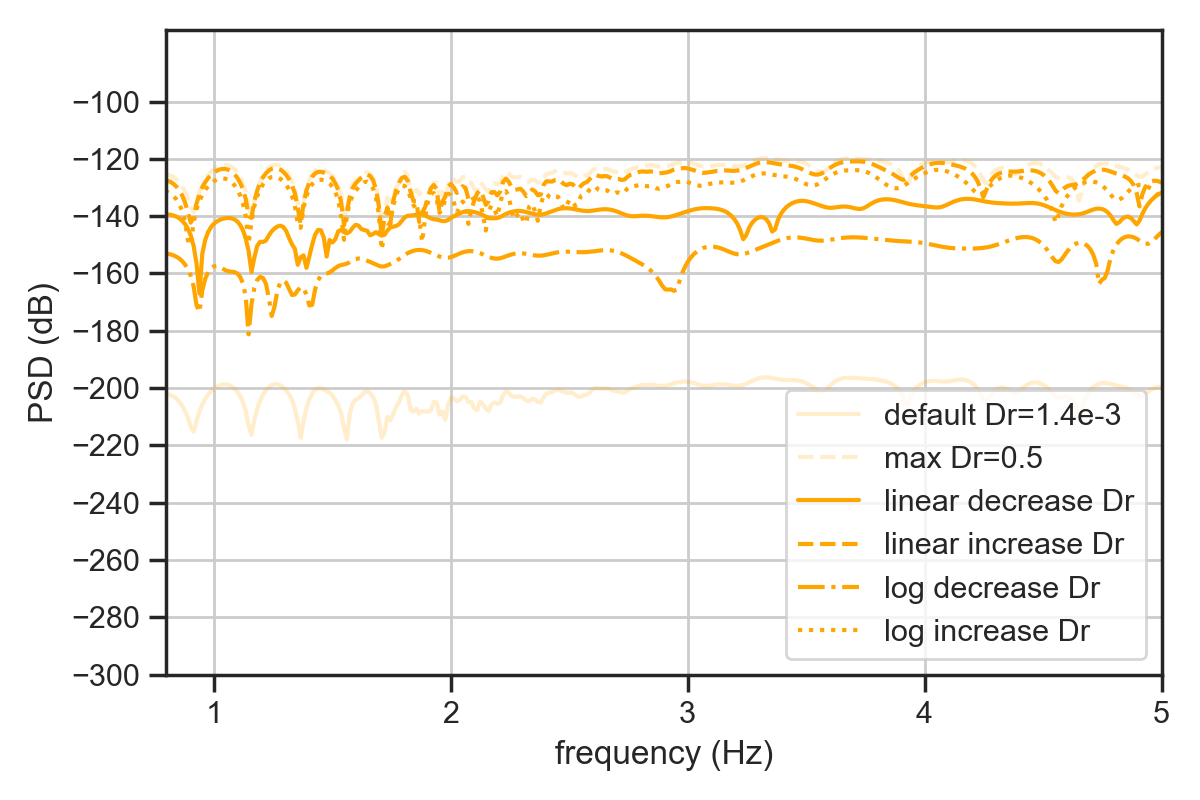

/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kco

In [34]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(f, SSnum_imp_dB, color='orange', linestyle='-', alpha=0.2, label='default Dr=1.4e-3')
plt.plot(f, SSnum_imp_max_dB, color='orange', linestyle='--', alpha=0.2, label='max Dr=0.5')
plt.plot(f, SSnum_imp_lin_dB, color='orange', linestyle='-', label='linear decrease Dr')
plt.plot(f, SSnum_imp_linR_dB, color='orange', linestyle='--', label='linear increase Dr')
plt.plot(f, SSnum_imp_log_dB, color='orange', linestyle='-.', label='log decrease Dr')
plt.plot(f, SSnum_imp_logR_dB, color='orange', linestyle=':', label='log increase Dr')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

Applying PSD to white noise in frequency domain and then transforming back into time domain to get waveform

In [35]:
N = len(f)*2 # number of Fourier sample points
h = 0.04 # grid spacing, nominally h=0.1 km for r=1

L = N*h # profile length

# white noise, unit normal distribution
randomGen = np.random.default_rng(seed=13)
y = randomGen.normal(size=N)

# scale so PSD has unit amplitude
y = y*np.sqrt(N/L)

Y = np.fft.fft(y)*h

# calculate PSD and check for unit amplitude
PSDy = np.abs(Y)**2/L
print(np.average(PSDy))

# apply Gestrich PSD
PSD_tot = SSnum_imp_integrated + SSnum_turb_integrated
gestPSD = np.concatenate((PSD_tot, np.flip(PSD_tot)))
Y_gestES = Y * np.sqrt(gestPSD)
Y_gestES[0] = 0
Y_gestES[-1] = 0
PSDy_gestES = np.abs(Y_gestES)**2/L

PSDy_gestES_dB = 10 * np.log10(PSDy_gestES)

# apply mod PS gestrich PSD
impactsPSD_mod_max = mod.impact_PSD(f, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                          df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
turbulencePSD_mod_max = mod.turbulence_PSD(f, u_mean=300, Db=1, rho_g=5, rho_s=2700, R=40,
                              df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
PSD_tot_PS = impactsPSD_mod_max + turbulencePSD_mod_max
gestPSD_PS = np.concatenate((PSD_tot_PS, np.flip(PSD_tot_PS)))
Y_gestPS = Y * np.sqrt(gestPSD_PS)
Y_gestPS[0] = 0
Y_gestPS[-1] = 0
PSDy_gestPS = np.abs(Y_gestPS)**2/L

PSDy_gestPS_dB = 10 * np.log10(PSDy_gestPS)

1.0010885632059703


/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1752207691.py:27: RuntimeWarning: divide by zero encountered in log10
  PSDy_gestES_dB = 10 * np.log10(PSDy_gestES)
/Users/kcoppess/muspelheim/gestrich-model/full_expression_PSD.py:19: RuntimeWarning: divide by zero encountered in power
  vc = vc0 * (f / f0) ** (-xi)
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:31: RuntimeWarning: divide by zero encountered in true_divide
  gf_fac *= np.sqrt(2 / (np.pi * k * rx))
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:31: RuntimeWarning: invalid value encountered in multiply
  gf_fac *= np.sqrt(2 / (np.pi * k * rx))
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:152: RuntimeWarning: divide by zero encountered in power
  Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_68759/1752207691.py:41: RuntimeWarning: divide by zero encountered in log10
  PSDy_gestPS_dB = 10 * np.log10(PSDy_ges

<IPython.core.display.Javascript object>


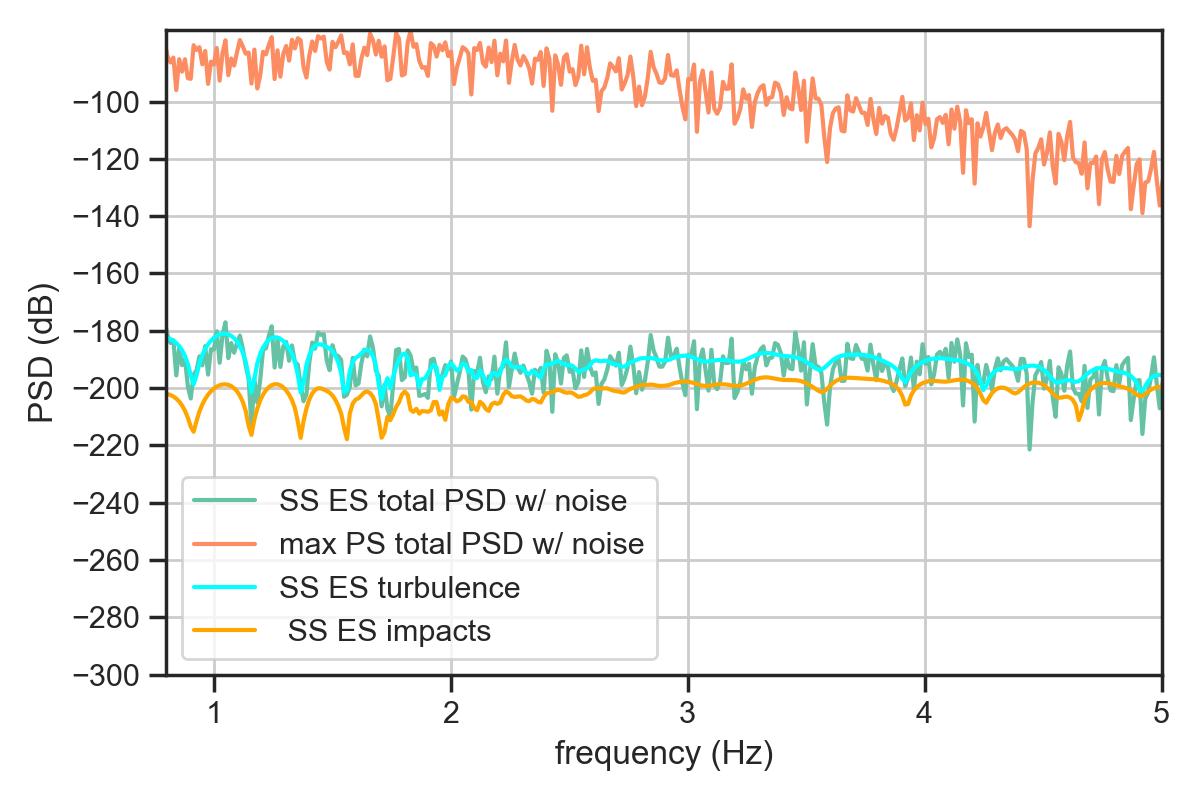

/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [36]:
%matplotlib notebook

plt.figure(figsize=(6,4))

# plt.plot(k, PSDy)
plt.plot(f, PSDy_gestES_dB[:int(N/2)], label='SS ES total PSD w/ noise')
plt.plot(f, PSDy_gestPS_dB[:int(N/2)], label='max PS total PSD w/ noise')
plt.plot(f, SSnum_turb_dB, color='cyan', linestyle='-', label='SS ES turbulence')
plt.plot(f, SSnum_imp_dB, color='orange', linestyle='-', label=' SS ES impacts')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

In [37]:
# transforming back into time domain

y_ES = np.fft.ifft(Y_gestES) / h
y_ES = np.real(y_ES)
y_PS_max = np.real(np.fft.ifft(Y_gestPS) / h)
t = np.arange(N) * h

<IPython.core.display.Javascript object>


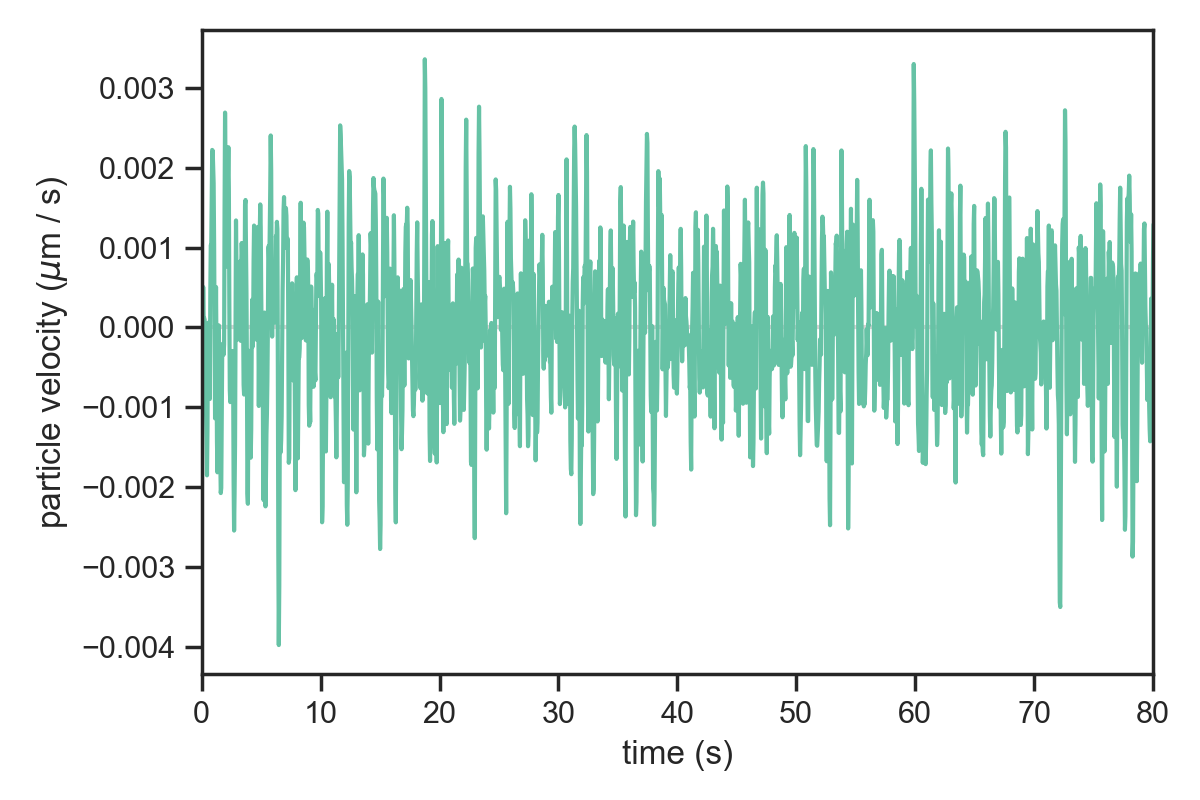

In [65]:
%matplotlib notebook
plt.figure(figsize=(6,4))

plt.axhline(0, color='lightgrey')
plt.plot(t, y_ES*1e6)
# plt.plot(t, y_PS_max*1e6)

plt.xlim(0,80)
plt.xlabel('time (s)')
plt.ylabel('particle velocity ($\mu$m / s)')
plt.tight_layout()
plt.show()

Looking for dominant contributions to the numerical GF PSD by convolving step source function with analytical expressions for direct s-waves only (wholespace), Rayleigh-wave only, and full numerical GFs for homogeneous halfspace.

In [39]:
v_s = 2000 # m/s
v_p = 3464.1016 # m/s
# density
rho_rock = 2700  # kg/m^3
# shear modulus (when mu = 0, just have p-waves and matches acoustic)
mu = rho_rock * v_s**2  # Pa
# p-wave modulus
Kp = rho_rock * v_p**2  # Pa
# Lame parameter
lame = Kp - 2 * mu

source_time = gf_time.copy()
dt = 0.04
tt = len(source_time)

sig = 0.2
time_shift = 8 * sig
force_rate = np.exp(-((source_time - time_shift)/ sig) **2 / 2) / (np.sqrt(2 * np.pi) * sig)

omega = np.fft.fftfreq(tt, dt) * (2 * np.pi)

force_rate_hat = np.fft.fft(force_rate) * dt
force_rate_hat *= np.exp(1j * omega * time_shift) # shifting to have centered at t=0
force = sint.cumtrapz(force_rate, x=source_time, initial=0)

<IPython.core.display.Javascript object>


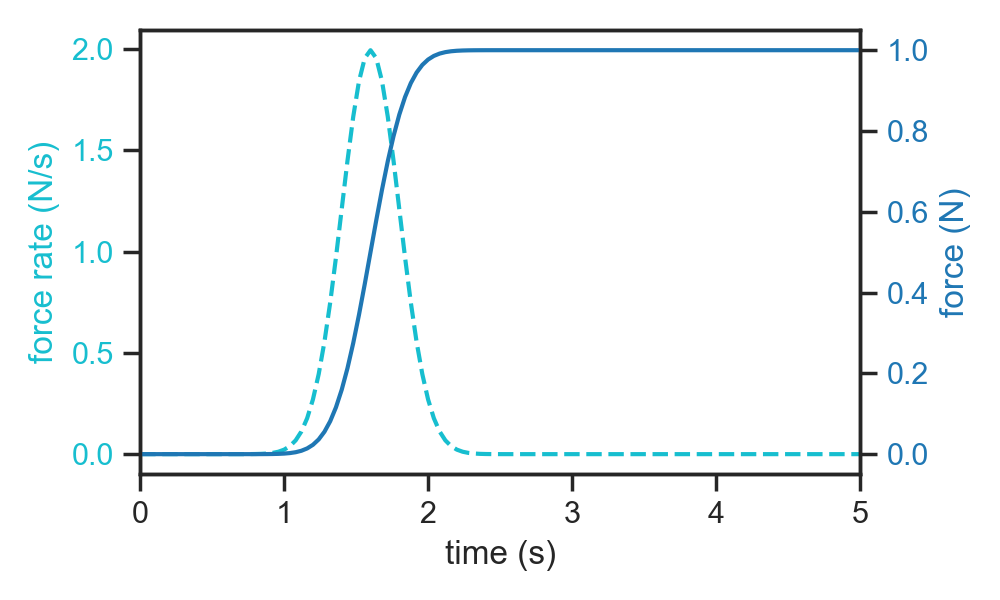

In [64]:
%matplotlib notebook

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:cyan'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('force rate (N/s)', color=color)
ax1.plot(source_time, force_rate, '--', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('force (N)', color=color)  # we already handled the x-label with ax1
ax2.plot(source_time, force, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.savefig('/Users/kcoppess/Desktop/gestrich/paper-figures/step-source.png', dpi=300)
plt.show()

In [ ]:
def alpha(phaseVel, waveSpeed):
    return np.sqrt(1 - (phaseVel ** 2 / waveSpeed ** 2), dtype='complex')


def rayleigh_function(phaseVel, c_s, c_p):
    """
    returns values of Rayleigh function, derived from solutions to equations of motion
    and enforcing boundary/radiation conditions for surface waves

    NB: roots give the allowed phase velocities of surface waves in medium
    """
    alphaS = alpha(phaseVel, c_s)
    alphaP = alpha(phaseVel, c_p)

    RR = (4 * alphaS * alphaP - (1 + alphaS ** 2) ** 2)

    return RR


def rayleigh_function_prime(phaseVel, c_s, c_p):
    """
    returns values of gradient of Rayleigh function
    """
    alphaS = alpha(phaseVel, c_s)
    alphaP = alpha(phaseVel, c_p)

    dRR_dc = -4 * (alphaP / alphaS) * (phaseVel / c_s ** 2)
    dRR_dc += -4 * (alphaS / alphaP) * (phaseVel / c_p ** 2)
    dRR_dc += 4 * (1 + alphaS ** 2) * (phaseVel / c_s ** 2)

    return dRR_dc

In [49]:
v_r = 0.92 * v_s
fullGF_hat = force_rate_hat[:int(tt/2)] * gf_hat[1][int(ll/2),:,0]
SWGF_hat = 2* force_rate_hat[:int(tt/2)] * np.exp(1j * omega[:int(tt/2)] * 10000 / v_s) / (4 * np.pi * rho_rock  * v_s**2 * 10000)
SWGF_hat *= np.exp(-np.abs(omega[:int(tt/2)]) * 10000 / (2 * v_s * 30))
# RWGF_hat = -2 *np.exp(1j * np.pi / 4) * np.sqrt(2*np.pi*omega[:int(tt/2)]/(10000*v_r))*omega[:int(tt/2)]/(v_s**2 * rayleigh_function_prime(v_r, v_s, v_p))
# RWGF_hat *= ((2 / v_r**2) - (1/v_s**2)) * np.exp(1j * omega[:int(tt/2)] * 10000/v_r) * np.exp(-omega[:int(tt/2)] * np.sqrt(((1 / v_r**2) - (1/v_p**2)) * depths[int(ll/2)]))
RWGF_hat = force_rate_hat[:int(tt/2)] * mod.Rayleigh_greens_function_vertical(f, rho_s=2700, rx=10000, vc0=v_r, Q=30)[2]

PSDfullGF = np.abs(fullGF_hat)**2/L
PSDSWGF = np.abs(SWGF_hat)**2/L
PSDRWGF = np.abs(RWGF_hat)**2/L

PSDfullGF_dB = 10 * np.log10(PSDfullGF)
PSDSWGF_dB = 10 * np.log10(PSDSWGF)
PSDRWGF_dB = 10 * np.log10(PSDRWGF)

/Users/kcoppess/muspelheim/gestrich-model/full_expression_PSD.py:19: RuntimeWarning: divide by zero encountered in power
  vc = vc0 * (f / f0) ** (-xi)
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:31: RuntimeWarning: divide by zero encountered in true_divide
  gf_fac *= np.sqrt(2 / (np.pi * k * rx))
/Users/kcoppess/muspelheim/gestrich-model/modular_PSD.py:31: RuntimeWarning: invalid value encountered in multiply
  gf_fac *= np.sqrt(2 / (np.pi * k * rx))


<IPython.core.display.Javascript object>


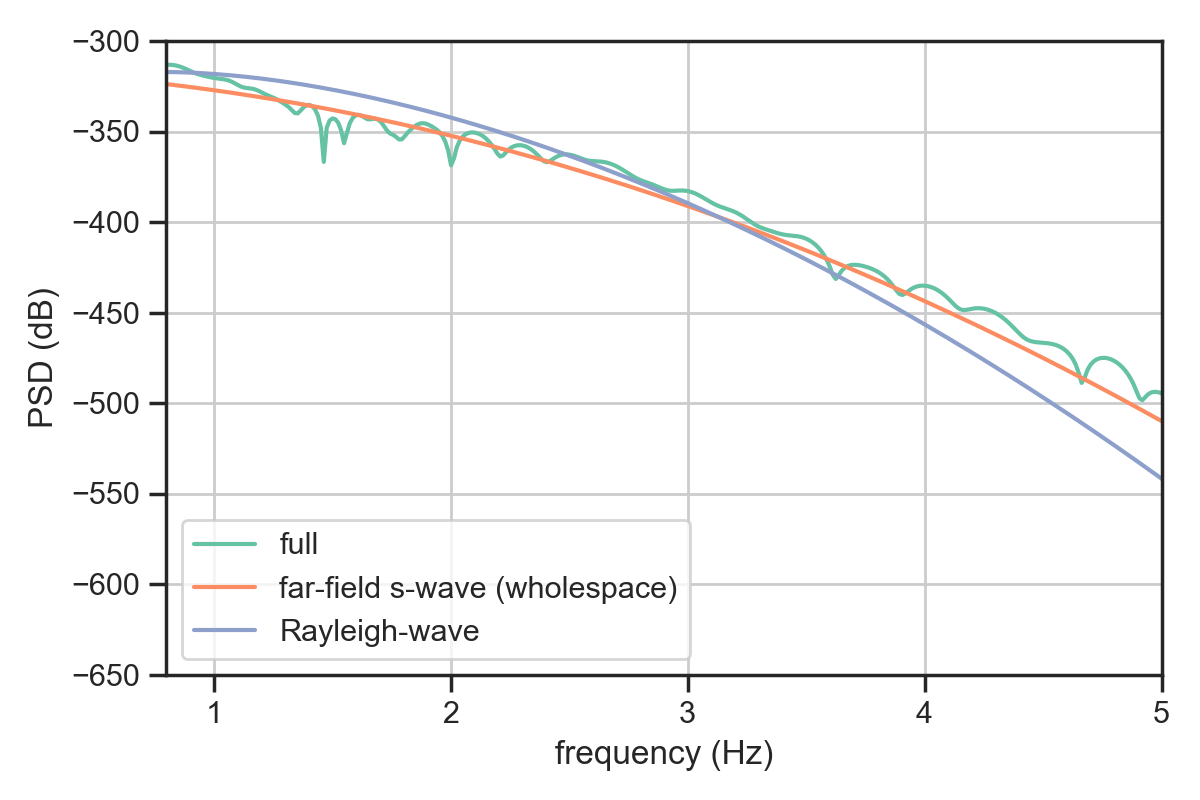

In [50]:
%matplotlib notebook

plt.figure(figsize=(6,4))

# plt.plot(k, PSDy)
plt.plot(f, PSDfullGF_dB, label='full')
plt.plot(f, PSDSWGF_dB, label='far-field s-wave (wholespace)')
plt.plot(f, PSDRWGF_dB, label='Rayleigh-wave')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-650, -300)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

In [ ]:
depths[int(ll/2)]